<a href="https://colab.research.google.com/github/Urban186/Astron-1221/blob/main/Rotation_Curve_of_the_Milky_Way_Bulge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$V = \sqrt\frac{GM}{R}$, this is the equation we use to calcualte orbital velocity

$M(R) = \frac{R(V)R^2}{G} $, this is the equation we use to calculate the mass of the Milky Way's bulge

In [ ]:
import astropy.units as u # we import astronomy units as U
import astropy.constants as const # we import astronomy constants as const
import numpy as np # we import this to be able to use mathematical equations in our code
import matplotlib.pyplot as plt # we import this to be able to plot our graphs

In [ ]:
G = const.G # define G as the gravitational constant
print (G.si) # print G in standard units

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [ ]:
def calculate_orbital_velocity(M, R): # we are defining the function of orbital veloicty by what changes
    """
    This is the function that calculates the orbital velocity
    Input:
    M, the mass of the central object
    R, the orbital radius of the satellite
    Output:
    orbitalVelocity, the orbital velocity of the satellite
    """
    caluclate_orbital_velocity = np.sqrt(const.G * M / R)
    return caluclate_orbital_velocity

In [ ]:
M_bulge = 1e10 * u.solMass # we define the mass of the bulge

In [ ]:
R_arr = np.arange(1, 30) * u.kpc # we define the orbital radius array in kiloparsecs
v_arr = calculate_orbital_velocity(M_bulge, R_arr) # we define the orbital velocity array
print (v_arr.to(u.km/u.s)) # we print the orbital velocites in kilometers per second

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177] km / s


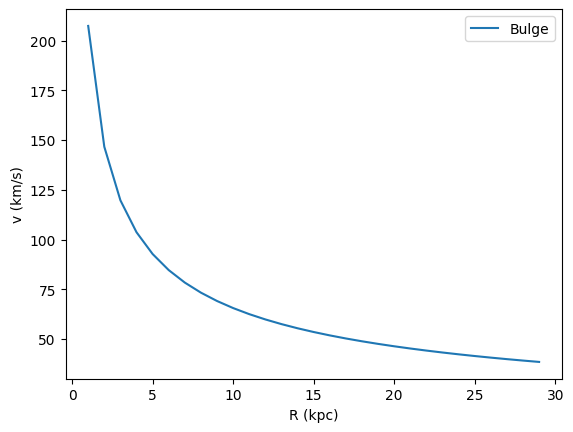

In [ ]:
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), label="Bulge") # we set what we're going to add to the graph while also labeling the bulge's line on the graph
plt.xlabel('R (kpc)') # we label the x axis
plt.ylabel('v (km/s)') # we label the y axis
plt.legend() # to show the legend of the figure
plt.show() # to show the figure

In [ ]:
M_disk = 1e11 * u.solMass # we define the mass of the Milky Way's disk
R_disk = 10 * u.kpc # we define the orbital radius of the disk
density_disk = M_disk / (4/3 * np.pi * R_disk**2) # we define the density of the disk
print (density_disk.to(1e6 * u.solMass/u.kpc**2)) # we print the density in solar mass divided by kiloparsec cubed

238.732414637843 1e+06 solMass / kpc2


In [ ]:
def calculatingEnclosedMassForDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)

In [ ]:
print(calculatingEnclosedMassForDisk(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForDisk(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc")

999.0264638415543 1e+06 solMass at 1 kpc
24975.66159603886 1e+06 solMass at 5 kpc


In [ ]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass):
    """
    Note that the halo mass is missing here, so that is what you will work on this Friday
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_total = M_disk + M_bulge
    return(M_total)

In [ ]:
v_bulge_arr = calculate_orbital_velocity(M_bulge, R_arr) # we redefine v_bulge_arr to prevent confusion

In [ ]:
# Define arrays to be calculated
M_disk = np.zeros(len(R_arr)) * u.solMass # Don't forget the unit here
M_total = np.zeros(len(R_arr)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = calculate_orbital_velocity(M_disk, R_arr)
v_bulge_disk_arr = calculate_orbital_velocity(M_total, R_arr)

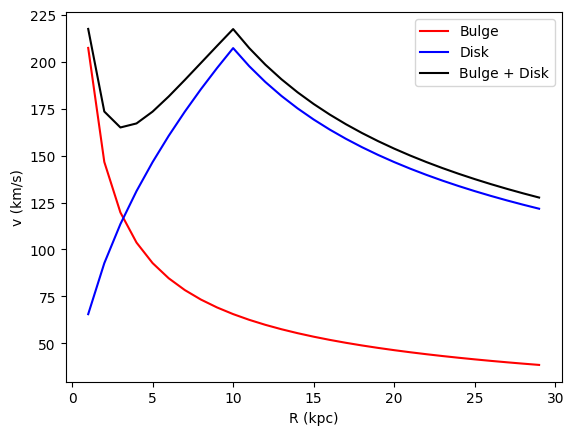

In [ ]:
# Plot them all
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

In [ ]:
# Define the total mass of the halo
M_halo = 1e12 * u.solMass # we define the mass of the halo
R_halo = 40 * u.kpc # we define the radius of the halo
density_halo = M_halo/(4/3 * np.pi*(R_halo**3)) # we define the density of the halo
print(density_halo.to(1e6 * u.solMass/u.kpc**3)) # we print the density in solar mass divided by kiloparsec cubed

3.7301939787162968 1e+06 solMass / kpc3


In [ ]:
def calculatingEnclosedMassForHalo(R, density=8.84 * 1e6 * u.solMass/u.kpc**3):
  """
  Calculate enclosed mass for the Halo component
  Input: R - orbital radius, density - density of the halo as calculated above
  Output: M - enclosed mass
  """
  if R < 40 * u.kpc:
    M = 4/3 * np.pi * (R**3) * density
  return(M)

In [ ]:
print(calculatingEnclosedMassForHalo(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForHalo(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc")

37.0289054103117 1e+06 solMass at 1 kpc
4628.613176288964 1e+06 solMass at 5 kpc


In [ ]:
def calculatingEnclosedMassForMilkyWay2(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass, M_halo = 1e12 * u.solMass/u.kpc**3):
    """
    We define the mass of the disk, bulge, halo, and the total mass of the Milky Way
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_halo = calculatingEnclosedMassForHalo(R, density=density_halo)
    M_total = M_disk + M_bulge + M_halo
    return(M_total)

In [ ]:
# Define arrays to be calculated
M_disk = np.zeros(len(R_arr)) * u.solMass # Don't forget the unit here
M_halo = np.zeros(len(R_arr)) * u.solMass
M_total = np.zeros(len(R_arr)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i])
    M_halo[i] = calculatingEnclosedMassForHalo(R_arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay2(R_arr[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = calculate_orbital_velocity(M_disk, R_arr)
v_halo_arr = calculate_orbital_velocity(M_halo, R_arr)
v_bulge_disk_arr = calculate_orbital_velocity(M_total, R_arr)

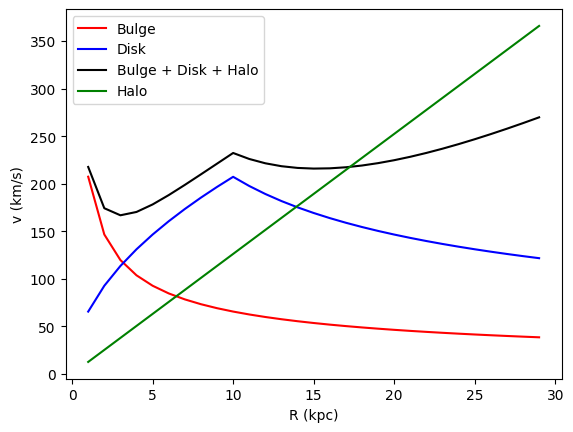

In [ ]:
# we plot them all
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk + Halo") # plotting bulge + disk components
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") # plotting halo
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

In [ ]:
# The following code allows you to upload a data file that you can find in my github page:
# https://github.com/wj198414/ASTRON1221/blob/main/DarkMatter/galaxy_rotation_2006.txt
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [ ]:
# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")


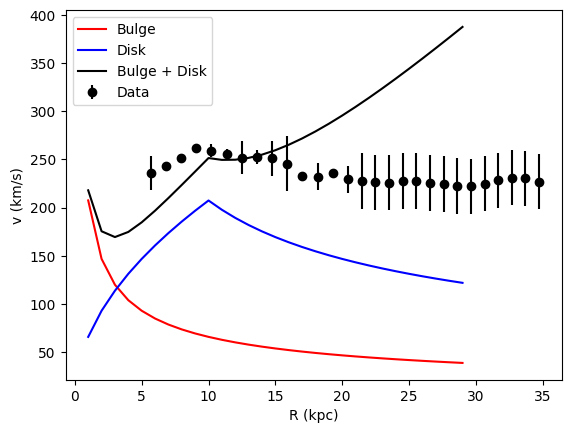

In [ ]:
# Plot the data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

# Overplot our calculations, basically copy and pater from the previous plotting coding cell
plt.plot(R_arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()